In [1]:
# Import code
from IsingModel import IsingModel

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

## Functionality
IsingModel has the following functions available:
- sample_energies: samples the energies for a given number of samples
- sample_spin_configurations: sample certain number of spin configurations with certain MC algorithm
- calculate_energy: calculate the energy of a given spin configuration
- visualize_energy: plot the sampled energy for a number of MC steps
- make_histogram: create a histogram that plots the distribution of the sampled energies / magnetizations
- get_magnetization: returns magnetization of a certain spin configuration
- get_exact_magnetization: returns exact magnetization for the initialized model
- plot_magnetization: returns plot like figure 3 in lecture notes, for a given number of sweeps

### Uniform sampling

In [ ]:
N = 10
model = IsingModel(
    size=N, 
    J=1, 
    T=4, 
    boundary_condition='helical', 
    sampling_method='uniform'
)

In [ ]:
num_samples = 10000

energies = model.sample_energies(num_samples)

# get energies per bond
E_bond = np.asarray(energies)/(2*N**2)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
samples = np.linspace(0, len(energies), len(energies))
ax.set_xlabel('Samples', fontsize=14)
ax.set_ylabel('Energy [ J ]', fontsize=14)
title = 'Energy per bond'
ax.plot(samples, E_bond, color='blue', alpha=0.7, label='samples')

plt.axhline(0, color='gray', linestyle='dashed', label=r'Baseline: $e = 0$')
ax.legend()
ax.set_title(title, fontsize=17)
fig.savefig('Plots/ex7_E_bond.png', dpi=300)
plt.tight_layout()
plt.show()

In [ ]:
model.make_histogram(energies, normalize=True)

In [ ]:
normalize=True
fig, ax = plt.subplots(1,1, figsize=(8,6))
title= 'Histogram of sampled energy, J = '+str(1)
if normalize == False:
    ax.hist(energies, bins=bins)
    ax.set_ylabel('Counts', fontsize=14)
if normalize == True:
    # energies_norm = self.energy_normalized(energies)
    ax.hist(energies, bins=25, density=True, label='normalized density')
    mu = np.sum(energies)/len(energies)
    sigma = np.std(energies)
    energy_min = np.min(energies)
    energy_max = np.max(energies)
    energy_array = np.linspace(energy_min, energy_max, 1000)
    gaussian = sp.stats.norm.pdf(energy_array, loc=mu, scale=sigma)
    ax.plot(energy_array, gaussian, color='red', label='Normal distribution')
    ax.legend()
    ax.set_ylabel('Normalized counts', fontsize=14)
ax.set_xlabel('Sampled energy [ J ]')
ax.set_title(title, fontsize=1)
fig.savefig('Plots/ex7_hist_sampled')

In [ ]:
# shift energies
def shift(energies, T):
    bin_counts, bin_edges = np.histogram(energies, bins=50)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2 
    
    # Reweight the histogram: P_T(E) = exp(-E/T) * P(E)
    P_T = np.exp(-bin_centers / T) * bin_counts
    P_T /= np.sum(P_T * np.diff(bin_edges))  # Normalize
    return P_T

In [ ]:
temperatures = [10E5, 10E3, 10E2, 100, 10, 2]

fig, ax = plt.subplots(1,1, figsize=(8,6))
for T in temperatures:
    P_T = shift(energies, T)
    ax.hist(P_T, bins=25, density=True)

In [ ]:
# Compute histogram of P(E) with 50 bins
bin_counts, bin_edges = np.histogram(energies, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Bin centers for plotting

# Define temperatures
temperatures = [10E5, 10E2, 10, 2]

# Plot P(E) for each temperature
plt.figure(figsize=(10, 6))
for T in temperatures:
    # Reweight the histogram: P_T(E) = exp(-E/T) * P(E)
    P_T = np.exp(-bin_centers / T) * bin_counts
    P_T /= np.sum(P_T * np.diff(bin_edges))  # Normalize

    plt.plot(bin_centers, P_T, label=f"T = {int(T)}")

# Original uniform sampling histogram
plt.hist(energies, bins=50, density=True, alpha=0.3, label="Uniform Sampling P(E)")

# Add labels and legend
plt.xlabel("Energy (E)", fontsize=13)
plt.ylabel(r"Reweighted $P_T(E)$", fontsize=13)
plt.title("Reweighted Energy Histograms for Different Temperatures")
plt.legend()
plt.savefig('Plots/ex7_reweighting.png', dpi=300)
plt.show()

### Boltzmann sampling: hit and miss method

In [ ]:
# initialize Boltzmann model

N=10

model_hit_and_miss = IsingModel(
    N,
    T = 10E5,
    boundary_condition = 'helical',
    sampling_method = 'hit and miss'
)

In [ ]:
num_samples = 10000

energies = model_hit_and_miss.sample_energies(num_samples)
model_hit_and_miss.visualize_energy(energies)

In [ ]:
print(energies)

In [ ]:
T = [10E5, 10E3, 10E2, 100, 10]

for i in range(len(T)):
    model = IsingModel(
        10,
        J=1,
        T=T[i],
        sampling_method='hit and miss',
        boundary_condition='helical'
    )
    num_sam = 10000
    frac = model.fraction_hits(num_sam)
    print('T = ', T[i], '       Fraction of hits: ', frac)

### Metropolis sampling

In [2]:
# initialize metropolis model
N = 50
model_metropolis = IsingModel(
    N,
    J=1,
    T=2,
    sampling_method='metropolis',
    boundary_condition='helical'
)

In [ ]:
num_samples = 10000
energies = model_metropolis.sample_energies(num_samples)
# print(energies)

In [ ]:
print(len(energies))

In [ ]:
model_metropolis.visualize_energy(energies)

In [ ]:
model_metropolis.make_histogram(energies, normalize=True)

1500000
0.911319377877496


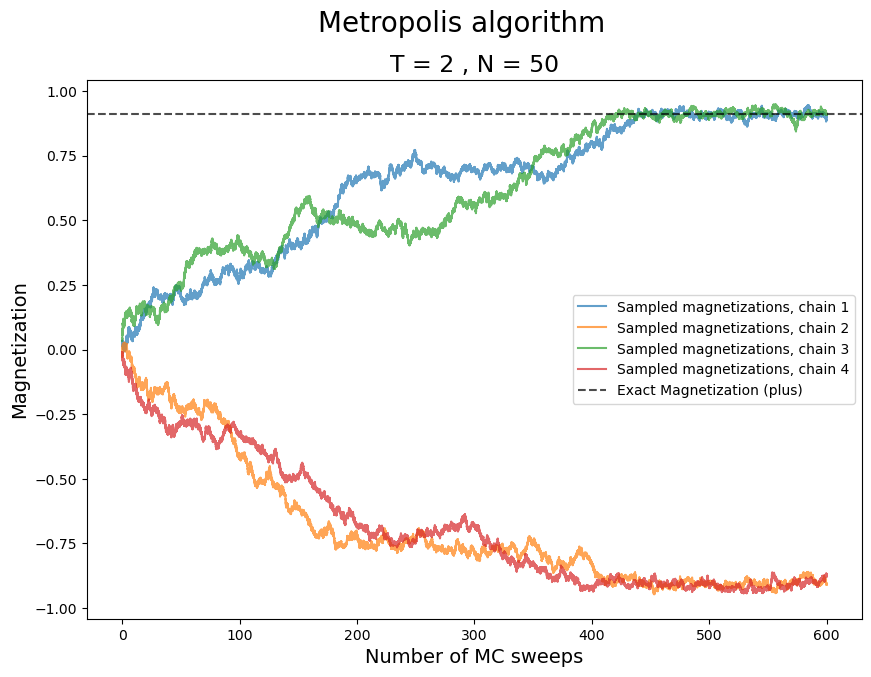

In [3]:
sweeps = 600
chains = 4
model_metropolis.plot_magnetization(sweeps, chains=chains)

In [ ]:
import numpy as np
J=1
T=1
M = (1-np.sinh(2*J/T)**(-4))**(1/8)
print(M)

In [ ]:
# same plot for the magnetization, but broken down in parts
# this allows for more flexibility and functionality

# Create spin samples
spin_samples = model_metropolis.sample_spin_configurations(10000)

# create magnetization plot
model_metropolis.plot_magnetization(len(spin_samples)/(N**2), spins=spin_samples)

In [ ]:
# from this figure we estimate the equilibration time to be about 20 sweeps. 
sweeps_equilibration = 20
# convert sweeps to MC steps
steps_equilibration = N**2*sweeps_equilibration

# create time vector
time = np.linspace(steps_equilibration, len(spin_samples), len(spin_samples)-steps_equilibration)
for t in time:
    model_metropolis.autocorrelation(int(t), steps_equilibration, spin_samples)

In [ ]:
# create histogram
fig, ax = plt.subplots(1,1, figsize=(8,6))
model = IsingModel(
    N,
    J=1,
    T=2,
    sampling_method='metropolis',
    boundary_condition='helical'
)

N = 50
model_uniform = IsingModel(
    size=N, 
    J=1, 
    T=2, 
    boundary_condition='helical', 
    sampling_method='uniform'
)

energies_metropolis = model.sample_energies(1000000)
E_bins, E_bin_edges = np.histogram(energies_metropolis[200*N**2], bins=50, density=True)
E_bin_center= (E_bin_edges[:-1] + E_bin_edges[1:]) / 2
ax.plot(E_bin_center, E_bins, color='black', label='Metropolis sampling')

energies = model_uniform.sample_energies(1000000)
# Compute histogram of P(E) with 50 bins
bin_counts, bin_edges = np.histogram(energies, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Bin centers for plotting

# Define temperatures
temperatures = [10E5, 10E2, 10, 2]

# Plot P(E) for each temperature
for T in temperatures:
    # Reweight the histogram: P_T(E) = exp(-E/T) * P(E)
    P_T = np.exp(-bin_centers / T) * bin_counts
    P_T /= np.sum(P_T * np.diff(bin_edges))  # Normalize

    ax.plot(bin_centers, P_T, label=f"T = {int(T)}")

# Original uniform sampling histogram
ax.hist(energies, bins=50, density=True, alpha=0.3, label="Uniform Sampling P(E)")

# Add labels and legend
ax.set_xlabel("Energy (E)", fontsize=13)
ax.set_ylabel(r"Reweighted $P_T(E)$", fontsize=13)
ax.set_title("Reweighted Energy Histograms for Different Temperatures")
ax.legend()
fig.savefig('Plots/ex8_reweighting.png', dpi=300)
plt.show()

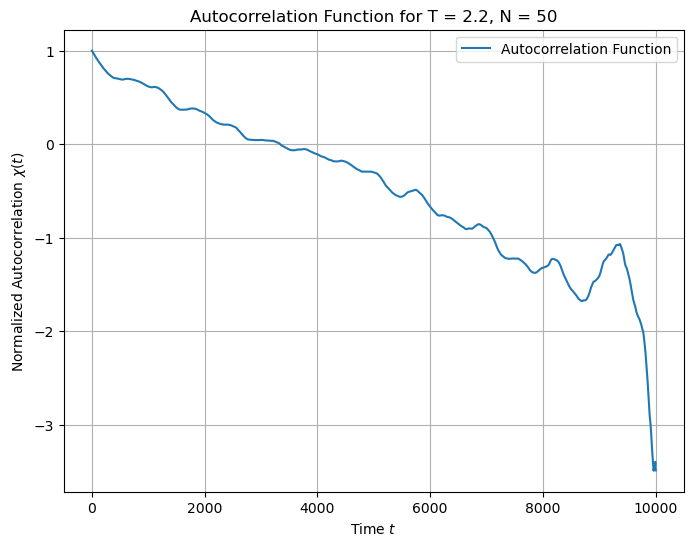

In [12]:
# autocorrelation function
N = 50  
T = 2.2  
tau_eq = 400*N*N 
t_f = 10000

def simulate_ising_magnetization(N, T, steps):
    model = IsingModel(
        size=N, 
        J=1, 
        T=2, 
        boundary_condition='helical', 
        sampling_method='metropolis'
    )
    magnetizations = np.zeros(steps)
    spins = model.initialize_spins()
    for k in range(steps):
        # 1 metropolis step
        spins = model.metropolis_step(spins)
        m = model.get_magnetization_1_conf(spins)
        magnetizations[k] = m
    return magnetizations
    
magnetizations = simulate_ising_magnetization(N, T, tau_eq + t_f + 100)

# Extract magnetizations after equilibration
m_eq = magnetizations[tau_eq : tau_eq + t_f]

# mean magnetization
mean_m = np.mean(m_eq)

# normalize
chi_0 = np.mean((m_eq - mean_m) ** 2)

autocorrelation = []
for t in range(t_f):
    chi_t = np.mean((m_eq[:t_f - t] - mean_m) * (m_eq[t:t_f] - mean_m))
    autocorrelation.append(chi_t / chi_0)


autocorrelation = np.array(autocorrelation)

# Plot the autocorrelation function
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(range(t_f), autocorrelation, label="Autocorrelation Function")
ax.set_xlabel("Time $t$")
ax.set_ylabel("Normalized Autocorrelation $\chi(t)$")
ax.set_title(f"Autocorrelation Function for T = {T}, N = {N}")
ax.legend()
ax.grid()
fig.savefig('Plots/ex8_autocorr.png', dpi=300)
plt.show()


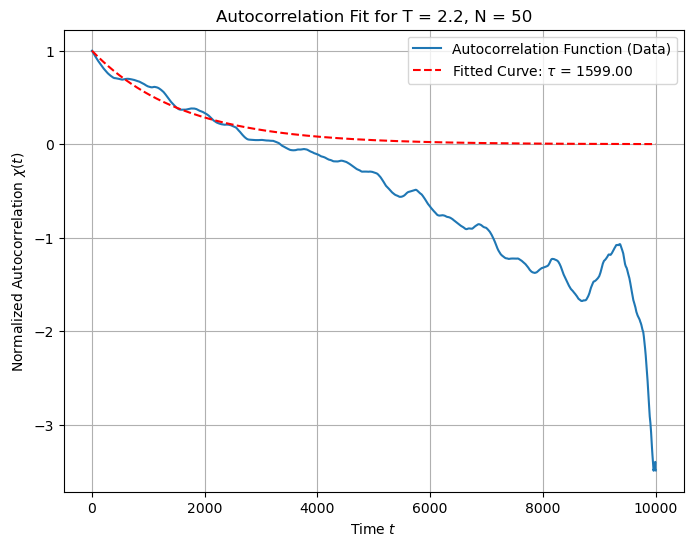

Fitted autocorrelation time (tau): 1599.00


In [13]:
from scipy.optimize import curve_fit

# Define the exponential decay function
def exp_decay(t, tau):
    return np.exp(-t / tau)

# Generate time values
time = np.arange(t_f)

# Fit the autocorrelation function using curve_fit
# Use only the part of the autocorrelation where it is positive
positive_indices = autocorrelation > 0
time_positive = time[positive_indices]
autocorr_positive = autocorrelation[positive_indices]

# Fit the data to the exponential function
popt, pcov = curve_fit(exp_decay, time_positive, autocorr_positive, p0=[100])  # Initial guess for tau

# Extract the fitted autocorrelation time
tau_fit = popt[0]

# Plot the data and the fitted curve
plt.figure(figsize=(8, 6))
plt.plot(time, autocorrelation, label="Autocorrelation Function (Data)")
plt.plot(time, exp_decay(time, tau_fit), label=f"Fitted Curve: $\\tau$ = {tau_fit:.2f}", color="red", linestyle="--")
plt.xlabel("Time $t$")
plt.ylabel("Normalized Autocorrelation $\chi(t)$")
plt.title(f"Autocorrelation Fit for T = {T}, N = {N}")
plt.legend()
plt.grid()
plt.show()

print(f"Fitted autocorrelation time (tau): {tau_fit:.2f}")


In [14]:
print(len(autocorrelation))

10000
